<h1><b>Credit Card Fruad Detection using Neural Networks</b></h1>

This notebook aims to explore the use of neural networks for detecting fraudulent credit card transactions. The ultimate goal is to develop a model that can accurately identify fraudulent transactions while minimising false positives. 

<h2><b>1. Exploratory Data Analysis (EDA)</b></h2>

This section explores the dataset 'creditcard.csv'. The dataset will be retrieved from Kaggle, where it is made available by Machine Learning Group at ULB (Université libre de Bruxelles). This dataset contains transactions made by credit cards in September 2013 by European cardholders. It includes a total of 284,807 transactions, of which 492 are fraudulent. The data features are transformed using PCA (Principal Component Analysis) due to confidentiality issue(Machine Learning Group - ULB & Andrea, 2018)8).


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file containing the credit card data into a dataframe
df = pd.read_csv('creditcard.zip', compression='zip')

# Display the first 5 rows of the dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Display the basic statistics of the dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
# Check for null values in the dataframe
null_values = df.isnull().sum().max()
print(f"Number of null values: {null_values}")

Number of null values: 0


In [4]:
# Display the columns in the dataframe
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\430137842.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=df, palette=colors)
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\430137842.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(x='Class', data=df, palette=colors)
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\430137842.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-fraud', 'Fraud'])


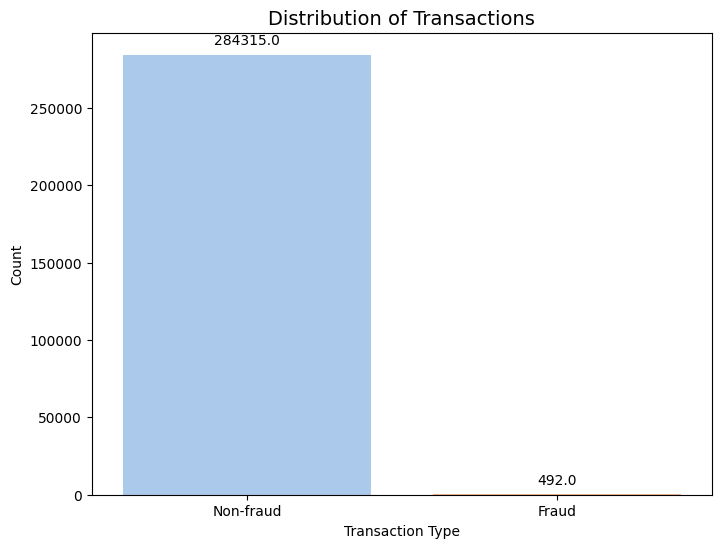

In [5]:
# Generate a pastel color palette
colors = sns.color_palette('pastel')

# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=df, palette=colors)

# Add title and labels to the plot
plt.title('Distribution of Transactions', fontsize=14)
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Modify x-tick labels
ax.set_xticklabels(['Non-fraud', 'Fraud'])

# Show the plot
plt.show()

The count plot above shows the distribution of fraud and non-fraud transactions in the dataset. The dataset is extremely imbalanced as a large majority of the transactions are non-fraud. Resampling methods will be applied later on.

<h2><b>2. Data Preprocessing</b></h2>

This section includes codes and explanations for data preprocessing, an important step in any machine learning projects. It covers scaling, resampling and the splitting of data.

<h3><b>2.1. Scaling</b></h3>

The majority of features in the dataset have already undergone scaling due to the application of PCA. However, 'Time' and 'Amount' have not been scaled. Hence, it is necessary to apply scaling techniques to standardise the features. This prevents features with larger numerical ranges from dominating the model training process.

RobustScaler was chosen as it is less sensitive to outliers compared to StandardScaler.

In [6]:
# Import necessary libraries
from sklearn.preprocessing import RobustScaler # RobustScaler is less prone to outliers

# Initialize RobustScaler
scaler = RobustScaler()

# Scale 'Amount' and 'Time' features using RobustScaler
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Drop original 'Amount' and 'Time' columns
df.drop(['Amount','Time'], axis=1, inplace=True)

# Save scaled 'Amount' and 'Time' columns for later use if needed
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

# Drop and re-insert scaled 'Amount' and 'Time' columns
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Display the first 5 rows of the modified DataFrame
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


<h3><b>2.2. Resampling</b></h3>

The EDA above showed the severe imbalanced dataset, where fraud-transactions are significantly outnumbered by non-fraud ones. When deciding on the sampling method to be used, undersampling was ultimately chosen. This is because oversampling and combined sampling is not feasible with the limited computational resources and the dataset size of nearly 300k datapoints. Undersampling reduces the number of non-fraudulent transactions to match the number of fraudulent ones, thus creating a balanced dataset for training our models.

Class
0    492
1    492
Name: count, dtype: int64


C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\2572382636.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=df_resampled, palette=colors)
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\2572382636.py:23: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(x='Class', data=df_resampled, palette=colors)
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\2572382636.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-fraud', 'Fraud'])


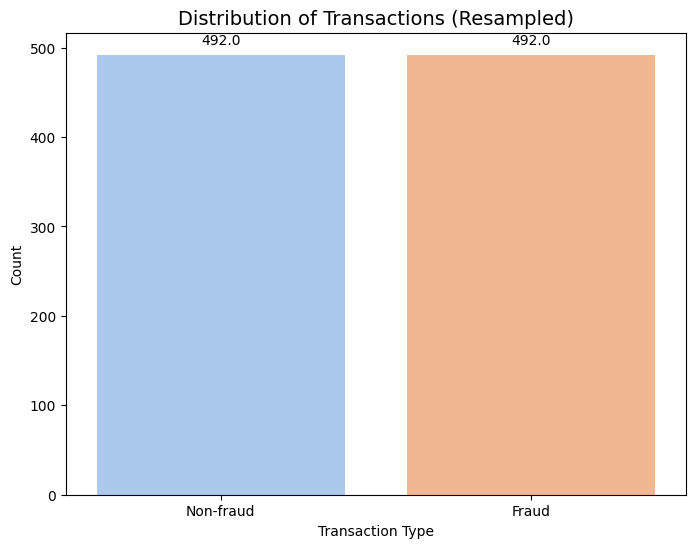

In [7]:
# Import necessary libraries
from imblearn.under_sampling import RandomUnderSampler

# Separate the input features (X) and the target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply the undersampler to the dataset
X_res, y_res = rus.fit_resample(X, y)

# Combine the resampled input features and target variable back into a DataFrame
df_resampled = pd.DataFrame(X_res, columns=X.columns)
df_resampled['Class'] = y_res

# Display the class distribution after undersampling
print(df_resampled['Class'].value_counts())

# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=df_resampled, palette=colors)

# Add title and labels to the plot
plt.title('Distribution of Transactions (Resampled)', fontsize=14)
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Modify x-tick labels
ax.set_xticklabels(['Non-fraud', 'Fraud'])

# Show the plot
plt.show()

The count plot above shows the resampled distribution of fraud and non-fraud transactions in the dataset. The dataset is now balanced.

<h3><b>2.3. Splitting Data</b></h3>

Data is split into training, testing and validation sets. The training set is used to train the model, the testing set is used to evaluate model performance, and the validation set is used to tune hyperparameters. 70% of the data goes into the training sets, 15% into the testing sets, and 15% into the validation sets.

In [8]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Separate the input features (X) and the target variable (y)
X = df_resampled.drop('Class', axis=1)
y = df_resampled['Class']

# First, split the data into training + validation set and testing set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Then, split the training + validation set into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Check the size of each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Display the class distribution in each set to ensure stratification
print("Class distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in validation set:")
print(y_val.value_counts())
print("\nClass distribution in testing set:")
print(y_test.value_counts())

Training set size: 590
Validation set size: 197
Testing set size: 197
Class distribution in training set:
Class
0    295
1    295
Name: count, dtype: int64

Class distribution in validation set:
Class
1    99
0    98
Name: count, dtype: int64

Class distribution in testing set:
Class
0    99
1    98
Name: count, dtype: int64


<h2><b>3. Initial Baseline Models</b></h2>

Baseline models provide a reference point for evaluating more complex models. Baseline models for Feedforward Neural Networks (FNN), Recurrent Neural Networks (RNN), and Convolutional Neural Networks (CNN) are created.

<h3><b>3.1. Feedforward Neural Networks (FNN)</b></h3>

A simple FNN with one hidden layer `Dense(64, input_dim=X_train.shape[1], activation='relu')` will serve as the baseline FNN model. Its performance will be evaluated using the classification report and training and validation loss curves.

In [9]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Create the FNN model
fnn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Single hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_fnn = fnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
y_pred_fnn = (fnn_model.predict(X_test) > 0.5).astype("int32")

# Display classification report
print("FNN Classification Report")
print(classification_report(y_test, y_pred_fnn))

C:\Users\Anastasia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6582 - loss: 0.5380 - val_accuracy: 0.6447 - val_loss: 0.4874
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7516 - loss: 0.4044 - val_accuracy: 0.7817 - val_loss: 0.3886
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8965 - loss: 0.3123 - val_accuracy: 0.8883 - val_loss: 0.3205
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9187 - loss: 0.2828 - val_accuracy: 0.9086 - val_loss: 0.2780
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9530 - loss: 0.2193 - val_accuracy: 0.9188 - val_loss: 0.2475
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9420 - loss: 0.2057 - val_accuracy: 0.9188 - val_loss: 0.2276
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9441 - loss: 0.1829 - val_accuracy: 0.9289 - val_loss: 0.2115
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9552 - loss: 0.1613 - val_accuracy: 0.9289 - val_loss

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\3879239712.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\3879239712.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])


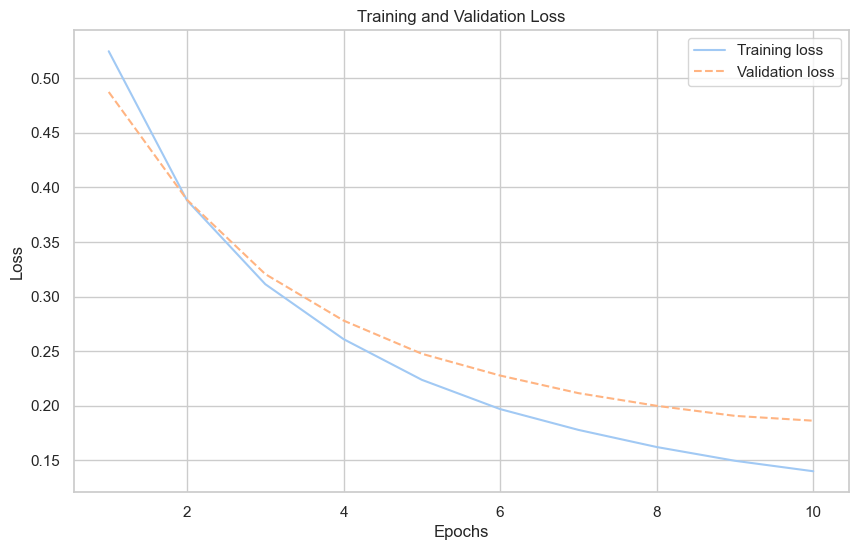

In [10]:
# Extract loss values from the history object
loss = history_fnn.history['loss']
val_loss = history_fnn.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h3><b>3.2. Recurrent Neural Network (RNN)</b></h3>

A simple RNN with one hidden layer `SimpleRNN(64, input_shape=(1, X_train.shape[1]), activation='relu')`will serve as the baseline RNN model. The data will be reshaped to fit the RNN input format, and the model will be trained and evaluated similarly.

In [11]:
# Import necessary libraries
from tensorflow.keras.layers import SimpleRNN

# Reshape the data for RNN (reshape to 3D)
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_rnn = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create the RNN model
rnn_model = Sequential([
    SimpleRNN(64, input_shape=(1, X_train.shape[1]), activation='relu'),  # Single RNN layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_rnn, y_val))

# Evaluate the model
y_pred_rnn = (rnn_model.predict(X_test_rnn) > 0.5).astype("int32")

# Display classification report
print("RNN Classification Report")
print(classification_report(y_test, y_pred_rnn))

Epoch 1/10


C:\Users\Anastasia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5314 - loss: 0.6418 - val_accuracy: 0.5990 - val_loss: 0.5167
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - loss: 0.4550 - val_accuracy: 0.7665 - val_loss: 0.4155
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8189 - loss: 0.3611 - val_accuracy: 0.8782 - val_loss: 0.3469
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9201 - loss: 0.3073 - val_accuracy: 0.9137 - val_loss: 0.2976
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9684 - loss: 0.2323 - val_accuracy: 0.9239 - val_loss: 0.2616
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9514 - loss: 0.2056 - val_accuracy: 0.9188 - val_loss: 0.2345
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9463 - loss: 0.2068 - val_accuracy: 0.9188 - val_loss: 0.2168
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9489 - loss: 0.1740 - val_accuracy: 0.9188 - val_loss: 0.2014
Ep

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\2622971505.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\2622971505.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])


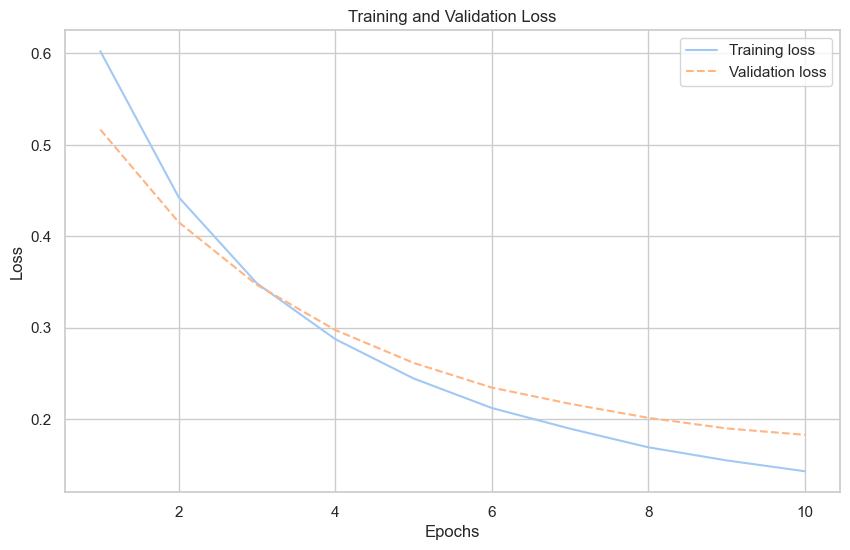

In [12]:
# Extract loss values from the history object
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h3><b>3.3. Convolutional Neural Network (CNN)</b></h3>

A simple RNN with one convolutional layer `Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1))`will serve as the baseline CNN model. The data will be reshaped to fit the CNN input format, and the model will be trained and evaluated accordingly.

In [13]:
# Import necessary libraries
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape the data for CNN (reshape to 3D)
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_cnn = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Create the CNN model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(30, 1)),  # Single Conv layer
    MaxPooling1D(pool_size=2),  # Pooling layer
    Flatten(),
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_cnn, y_val))

# Evaluate the model
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

# Display classification report
print("CNN Classification Report")
print(classification_report(y_test, y_pred_cnn))

Epoch 1/10


C:\Users\Anastasia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5234 - loss: 0.8575 - val_accuracy: 0.5431 - val_loss: 0.5465
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6174 - loss: 0.5175 - val_accuracy: 0.8071 - val_loss: 0.4590
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8217 - loss: 0.4313 - val_accuracy: 0.8832 - val_loss: 0.3954
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8947 - loss: 0.3767 - val_accuracy: 0.8934 - val_loss: 0.3512
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9208 - loss: 0.3070 - val_accuracy: 0.9036 - val_loss: 0.3122
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9314 - loss: 0.2721 - val_accuracy: 0.9188 - val_loss: 0.2836
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9091 - loss: 0.2850 - val_accuracy: 0.9239 - val_loss: 0.2626
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9317 - loss: 0.2303 - val_accuracy: 0.9289 - val_loss: 0.2472
Ep

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\897583481.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\897583481.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])


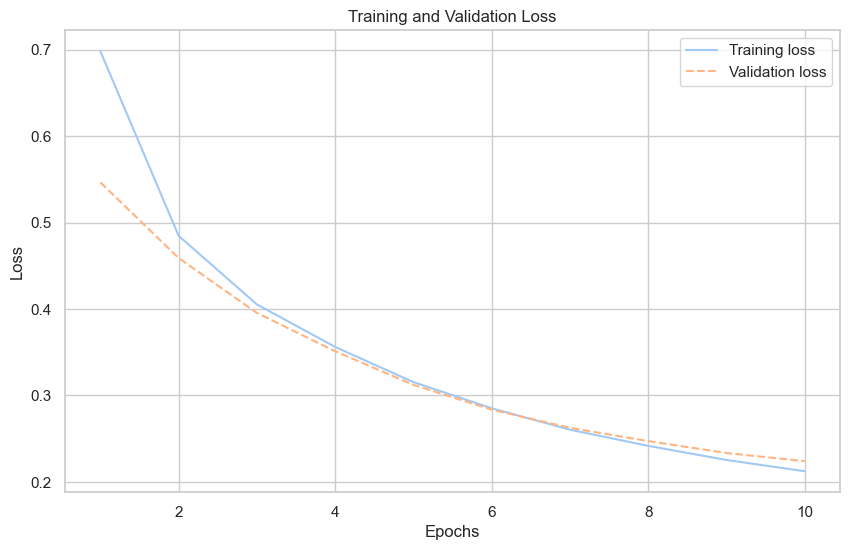

In [14]:
# Extract loss values from the history object
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h1><b>4. Enhanced Baseline Models</b></h1>

<h3><b>4.1. Enhanced Feedforward Neural Network (FNN)</b></h3>

The enhanced FNN model has 2 hidden layers with 128 and 64 neurons respectively. Each hidden layer uses the ReLU activation function and is regularised using L2 regularisation to mitigate overfitting. A dropout rate of 50% is also included after each hidden layer to enhance generalisation. Similar to the baseline models, the final output layer uses a sigmoid activation function for the binary classification task of detecting fraud or non-fraud transactions. 

The model is compiled with the Adam optimiser and binary cross-entropy loss function, and trained over 10 epochs with a batch size of 32. Its performance will be evaluated using the classification report and training and validation loss curves. 

In [15]:
# Import necessary libraries
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Create the FNN model
new_fnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
new_fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_new_fnn = new_fnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
y_pred_new_fnn = (new_fnn_model.predict(X_test) > 0.5).astype("int32")

# Display classification report
print("FNN Classification Report")
print(classification_report(y_test, y_pred_new_fnn))

C:\Users\Anastasia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5531 - loss: 2.1912 - val_accuracy: 0.8376 - val_loss: 1.6138
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7825 - loss: 1.6355 - val_accuracy: 0.8985 - val_loss: 1.4313
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 1.5184 - val_accuracy: 0.9137 - val_loss: 1.2857
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8996 - loss: 1.3015 - val_accuracy: 0.9239 - val_loss: 1.1757
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8998 - loss: 1.1878 - val_accuracy: 0.9289 - val_loss: 1.0846
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9263 - loss: 1.0856 - val_accuracy: 0.9340 - val_loss: 1.0066
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9212 - loss: 1.0283 - val_accuracy: 0.9289 - val_loss: 0.9402
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9285 - loss: 0.9401 - val_accuracy: 0.9289 - val_loss

The baseline FNN model achieved an accuracy of 0.95, while the enhanced FNN model improved to 0.96. Precision and recall also increased from 0.95 to 0.96, indicating the enhanced model is slightly better at minimising false positives and detecting actual fraud transactions. The F1-score similarly improved from 0.95 to 0.96, further highlighting the enhanced model’s balanced performance between precision and recall.

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\2070824450.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\2070824450.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])


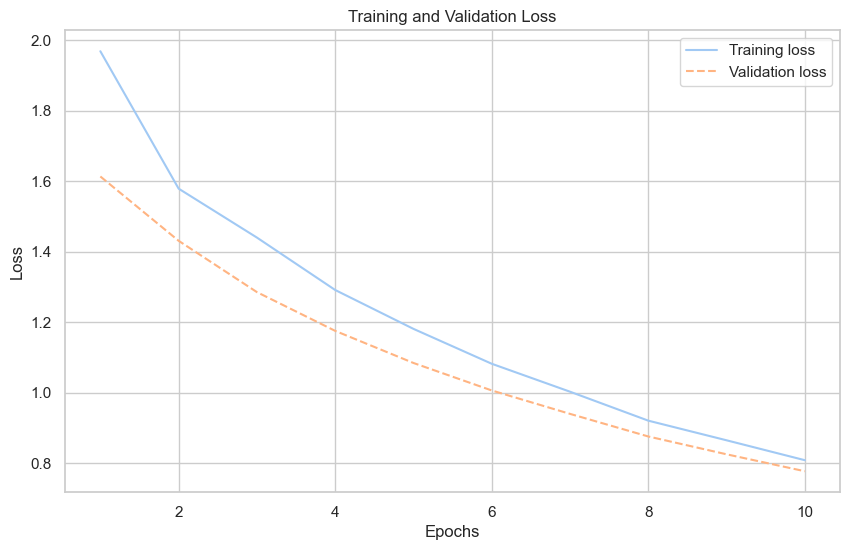

In [16]:
# Extract loss values from the history object
loss = history_new_fnn.history['loss']
val_loss = history_new_fnn.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Despite the identical metrics, the loss curves provide further insight. The baseline FNN model's loss ranged from 0.15 to 0.55, with intersecting curves suggesting potential overfitting, meaning the model might perform well on training data but could struggle with unseen data. The enhanced model’s losses, though higher, showed no intersections, indicating better stability and generalisation to unseen transactions. This stability makes the enhanced FNN model more reliable in real-world scenarios where the system needs to generalise to unpredictable data.

<h3><b>4.2. Enhanced Recurrent Neural Network (RNN)</b></h3>

The enhanced RNN model has 2 LSTM layers with 128 and 64 neurons respectively. The first LSTM layer is configured to return sequences, allowing for processing of sequences of data, and is followed by another LSTM layer to capture temporal dependencies. Both layers incorporate L2 regularisation to mitigate overfitting and dropout (50%) to enhance generalisation. The final output layer uses a sigmoid activation function for the binary classification task of detecting fraud or non-fraud transactions.  

The model is compiled with the Adam optimiser and binary cross-entropy loss function, and trained over 10 epochs with a batch size of 32. Its performance will be evaluated using the classification report and training and validation loss curves.

In [17]:
# Import necesssary libraries
from tensorflow.keras.layers import LSTM

# Create the RNN model
new_rnn_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[1]), kernel_regularizer=l2(0.01), dropout=0.5),
    LSTM(64, kernel_regularizer=l2(0.01), dropout=0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
new_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_new_rnn = new_rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_rnn, y_val))

# Evaluate the model
y_pred_new_rnn = (new_rnn_model.predict(X_test_rnn) > 0.5).astype("int32")

# Display classification report
print("RNN Classification Report")
print(classification_report(y_test, y_pred_new_rnn))

C:\Users\Anastasia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6997 - loss: 2.7165 - val_accuracy: 0.8629 - val_loss: 2.0168
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8391 - loss: 1.8672 - val_accuracy: 0.8934 - val_loss: 1.3683
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8702 - loss: 1.2734 - val_accuracy: 0.8985 - val_loss: 0.9590
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8967 - loss: 0.8964 - val_accuracy: 0.9137 - val_loss: 0.7056
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9222 - loss: 0.6553 - val_accuracy: 0.9188 - val_loss: 0.5458
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9164 - loss: 0.5304 - val_accuracy: 0.9188 - val_loss: 0.4462
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9226 - loss: 0.4406 - val_accuracy: 0.9188 - val_loss: 0.3797
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9120 - loss: 0.3867 - val_accuracy: 0.9188 - val_loss

Both baseline and enhanced RNN models achieved an accuracy of 0.95, with precision, recall, and F1-scores remaining consistent at 0.95.

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\1181167276.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\1181167276.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])


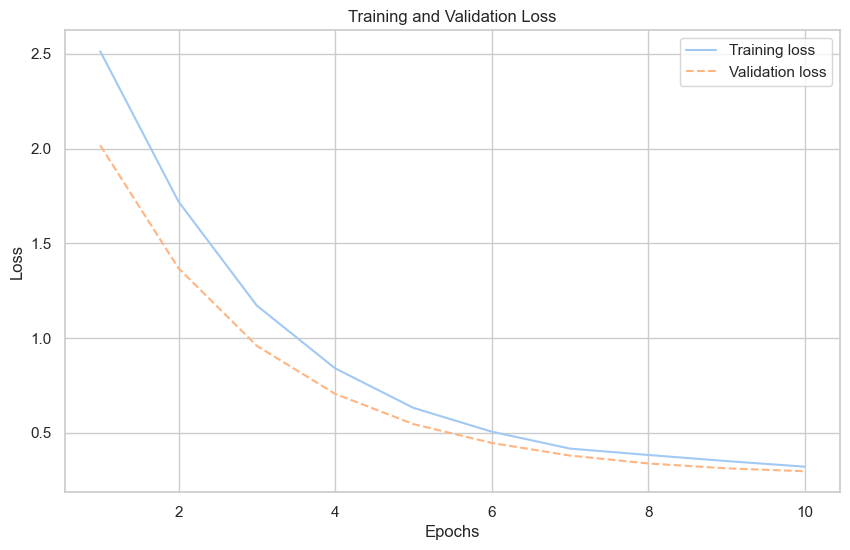

In [18]:
# Extract loss values from the history object
loss = history_new_rnn.history['loss']
val_loss = history_new_rnn.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The baseline RNN’s losses ranged from 0.1 to 0.6, with intersecting curves suggesting overfitting. The enhanced RNN’s losses started at 0.25, with no intersections, indicating better stability and potential for generalisation.

<h3><b>4.3. Enhanced Convolutional Neural Network (CNN)</b></h3>

The enhanced CNN model begins with a Conv1D layer with 64 filters and a kernel size of 3, followed by a MaxPooling1D layer to reduce dimensionality, and a Dropout layer set at 50% to mitigate overfitting. This is followed by a second Conv1D layer with 128 filters, another MaxPooling1D layer, and an additional Dropout layer (also 50%). Then, the model flattens the output and feeds it into a Dense layer with 128 units, which also includes Dropout (50%). The final output layer uses a sigmoid activation function for the binary classification task of detecting fraud or non-fraud transactions.  

The model is compiled with the Adam optimiser and binary cross-entropy loss function, and trained over 10 epochs with a batch size of 32. Its performance will be evaluated using the classification report and training and validation loss curves.

In [19]:
# Create the CNN model
new_cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
new_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_new_cnn = new_cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_cnn, y_val))

# Evaluate the model
y_pred_new_cnn = (new_cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

# Display classification report
print("CNN Classification Report")
print(classification_report(y_test, y_pred_new_cnn))

C:\Users\Anastasia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5394 - loss: 3.5011 - val_accuracy: 0.9137 - val_loss: 2.7156
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8415 - loss: 2.5471 - val_accuracy: 0.9086 - val_loss: 2.0377
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8944 - loss: 1.9283 - val_accuracy: 0.9137 - val_loss: 1.5655
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9164 - loss: 1.4824 - val_accuracy: 0.9137 - val_loss: 1.2650
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9264 - loss: 1.2258 - val_accuracy: 0.9239 - val_loss: 1.0544
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9072 - loss: 1.0529 - val_accuracy: 0.9289 - val_loss: 0.9056
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9226 - loss: 0.8665 - val_accuracy: 0.9239 - val_loss: 0.7733
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9299 - loss: 0.7385 - val_accuracy: 0.9188 - val_loss

Both baseline and enhanced CNN models achieved an accuracy of 0.95, with precision, recall, and F1-scores steady at 0.95.

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\851185819.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\851185819.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])


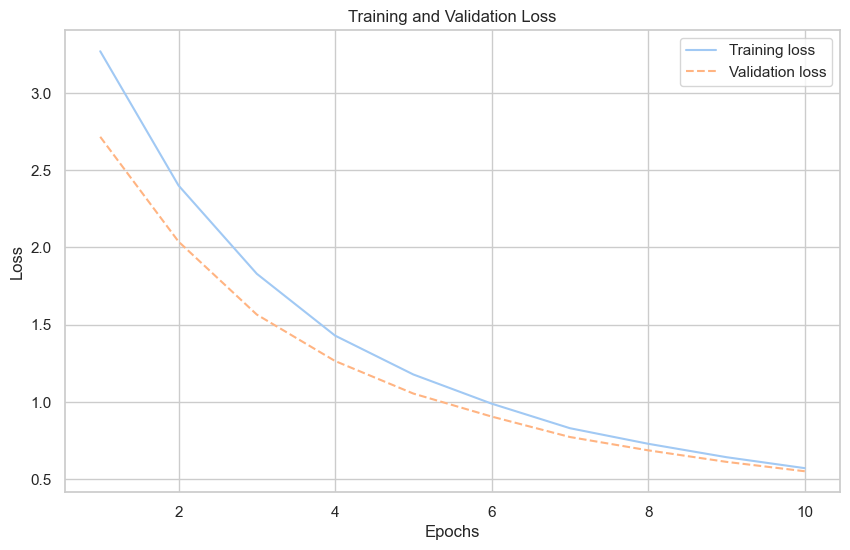

In [20]:
# Extract loss values from the history object
loss = history_new_cnn.history['loss']
val_loss = history_new_cnn.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The baseline CNN’s losses ranged from 0.2 to 0.7, with intersecting curves suggesting overfitting. The enhanced CNN’s losses started at 0.6, with no intersections, indicating better stability and generalisation.

<h2><b>5. Hybrid Model</b></h2>

While the enhanced FNN, RNN, and CNN models have demonstrated distinct advantages and limitations, combining their capabilities can address individual weaknesses and improve overall performance.

<h3><b>5.1. Basic Hybrid Model</b></h3>

The basic hybrid model combines the three different architectures: CNN, RNN, and FNN. Each of the architectures processes the input data in a unique way, allowing the model to capture diverse features. 

The CNN processes the input as a one-dimensional sequence, applying convolutional and pooling layers to extract spatial features. The RNN processes the input as a temporal sequence, using a SimpleRNN layer to capture sequential patterns. The FNN processes the input as a flat vector, using dense layers to learn complex relationships. The outputs from each of these networks are then concatenated into a single vector, which is passed through several dense layers with dropout.

The model is compiled with the Adam optimiser and binary cross-entropy loss function, and trained over 10 epochs with a batch size of 32. Its performance will be evaluated using the classification report and training and validation loss curves.

In [21]:
# Import necessary libraries
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.models import Model

# Define the input layers
input_layer_cnn = Input(shape=(X_train.shape[1], 1))
input_layer_rnn = Input(shape=(1, X_train.shape[1]))
input_layer_fnn = Input(shape=(X_train.shape[1],))

# CNN part
cnn = Conv1D(32, kernel_size=3, activation='relu')(input_layer_cnn)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn_output = Dense(64, activation='relu')(cnn)

# RNN part
rnn = SimpleRNN(64, activation='relu')(input_layer_rnn)
rnn_output = Dense(64, activation='relu')(rnn)

# FNN part
fnn = Dense(64, activation='relu')(input_layer_fnn)
fnn_output = Dense(64, activation='relu')(fnn)

# Concatenate the outputs
concatenated = concatenate([cnn_output, rnn_output, fnn_output])

# Add a few dense layers for learning from combined features
x = Dense(128, activation='relu')(concatenated)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Final output layer
output_layer = Dense(1, activation='sigmoid')(x)

In [22]:
# Define the model
hybrid_model = Model(inputs=[input_layer_cnn, input_layer_rnn, input_layer_fnn], outputs=output_layer)

# Compile the model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_hybrid = hybrid_model.fit(
    [X_train_cnn, X_train_rnn, X_train], y_train,
    epochs=10, batch_size=32,
    validation_data=([X_val_cnn, X_val_rnn, X_val], y_val)
)

# Evaluate the model
y_pred_hybrid = (hybrid_model.predict([X_test_cnn, X_test_rnn, X_test]) > 0.5).astype("int32")

# Display classification report
print("Hybrid Model Classification Report")
print(classification_report(y_test, y_pred_hybrid))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6332 - loss: 0.8593 - val_accuracy: 0.9188 - val_loss: 0.3237
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8873 - loss: 0.3624 - val_accuracy: 0.9239 - val_loss: 0.2165
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9400 - loss: 0.2155 - val_accuracy: 0.9340 - val_loss: 0.1715
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9332 - loss: 0.2028 - val_accuracy: 0.9289 - val_loss: 0.1841
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9391 - loss: 0.1668 - val_accuracy: 0.9137 - val_loss: 0.1956
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9707 - loss: 0.1186 - val_accuracy: 0.9086 - val_loss: 0.1912
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9560 - loss: 0.1353 - val_accuracy: 0.9137 - val_loss: 0.1864
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9671 - loss: 0.1113 - val_accuracy: 0.9188 - val_loss

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\2869180592.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\2869180592.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])


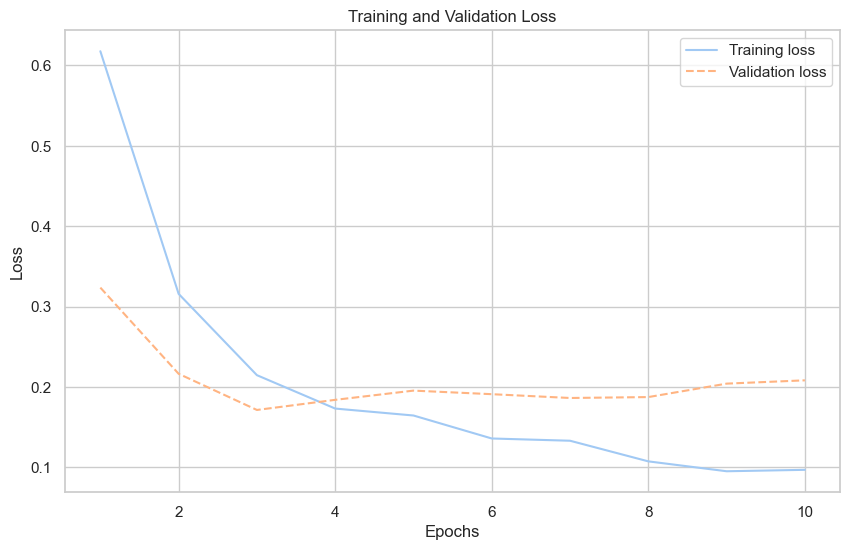

In [23]:
# Extract loss values from the history object
loss = history_hybrid.history['loss']
val_loss = history_hybrid.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h3><b>5.2. Enhanced Hybrid Model</b></h3>

The enhanced hybrid model builds on the basic hybrid model by incorporating advanced techniques such as L2 regularisation, batch normalisation, and early stopping. The three different architectures each includes L2 regularisation to mitigate overfitting. The FNN includes batch normalisation after the dense layers to stabilise and accelerate training by normalising the inputs. The subsequent dense layers also employ L2 regularisation and batch normalisation, followed by dropout layers.

In [24]:
# Import necessary libraries
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# CNN part with L2 regularization
cnn = Conv1D(32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01))(input_layer_cnn)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn_output = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(cnn)

# RNN part with L2 regularization
rnn = LSTM(32, kernel_regularizer=l2(0.01), return_sequences=False)(input_layer_rnn)
rnn_output = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(rnn)

# FNN part with L2 regularization and Batch Normalization
fnn = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer_fnn)
fnn = BatchNormalization()(fnn)
fnn_output = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(fnn)

# Concatenate the outputs
concatenated = concatenate([cnn_output, rnn_output, fnn_output])

# Add dense layers with L2 regularization and Batch Normalization
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(concatenated)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Final output layer
output_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(x)

In [25]:
# Define the model
new_hybrid_model = Model(inputs=[input_layer_cnn, input_layer_rnn, input_layer_fnn], outputs=output_layer)

# Compile the model
new_hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_new_hybrid = new_hybrid_model.fit(
    [X_train_cnn, X_train_rnn, X_train], y_train,
    epochs=10, batch_size=32,
    validation_data=([X_val_cnn, X_val_rnn, X_val], y_val),
    callbacks=[early_stopping]
)

# Evaluate the model
y_pred_new_hybrid = (new_hybrid_model.predict([X_test_cnn, X_test_rnn, X_test]) > 0.5).astype("int32")

# Display classification report
print("Hybrid Model Classification Report")
print(classification_report(y_test, y_pred_new_hybrid))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.5647 - loss: 4.3253 - val_accuracy: 0.7716 - val_loss: 3.7235
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8141 - loss: 3.5955 - val_accuracy: 0.8477 - val_loss: 3.4369
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8779 - loss: 3.2742 - val_accuracy: 0.8985 - val_loss: 3.1662
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8719 - loss: 3.0624 - val_accuracy: 0.9086 - val_loss: 2.9206
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9024 - loss: 2.8404 - val_accuracy: 0.9188 - val_loss: 2.7029
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8816 - loss: 2.6415 - val_accuracy: 0.9137 - val_loss: 2.5119
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9170 - loss: 2.4731 - val_accuracy: 0.9137 - val_loss: 2.3649
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9349 - loss: 2.2654 - val_accuracy: 0.9137 - val_loss

The basic hybrid model achieved an accuracy of 0.93, while the enhanced model slightly improved to 0.96, indicating that the enhanced model is better at correctly classifying transactions as either fraud or non-fraud. Both models showed high precision, with the basic model at 0.93 and the enhanced model at 0.96. This suggests that the enhanced model flags fewer legitimate transactions as fraud. The recall also improved from 0.93 in the basic model to 0.96 in the enhanced model, indicating that the enhanced model is better at identifying actual fraudulent transactions. The F1-score increased from 0.93 to 0.96, indicating that the enhanced model provides a slightly better overall performance.

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\1200510692.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_13732\1200510692.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])


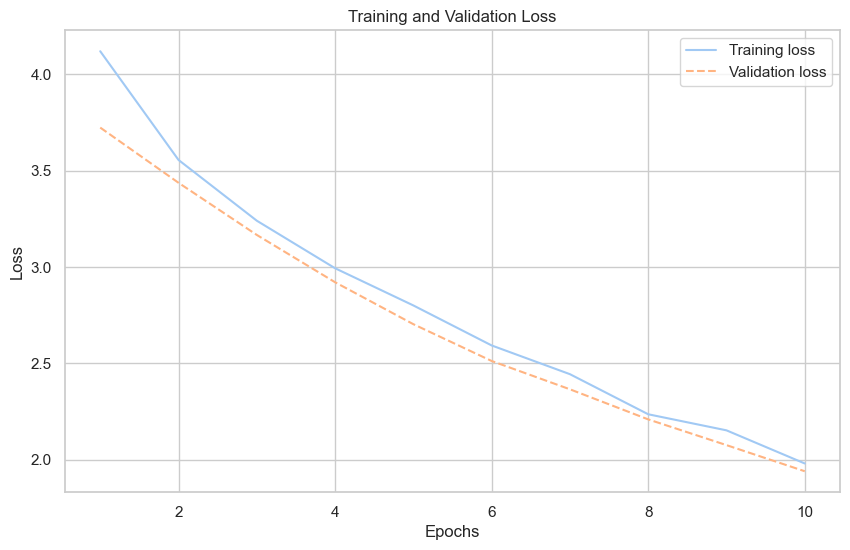

In [26]:
# Extract loss values from the history object
loss = history_new_hybrid.history['loss']
val_loss = history_new_hybrid.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
plt.plot(epochs, loss, 'b', label='Training loss', color=colors[0])
plt.plot(epochs, val_loss, 'b', label='Validation loss', linestyle='--', color=colors[1])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training and validation loss curves for the basic hybrid model range from 0.1 to 0.55. However, these curves intersect, particularly after epoch 3, where the validation loss begins to increase. This suggests that the basic hybrid model is prone to overfitting, meaning it performs well on training data but struggles to generalise to new, unseen data. The increase in validation loss after epoch 5 indicates that the model starts to lose its effectiveness as training progresses. In contrast, the enhanced hybrid model showed a high loss, with the lowest being around 1.0 to 2.0. However, the curves do not intersect but come close to each other, indicating better stability and reduced overfitting. This suggests that the enhanced model is likely to generalise better to new data.

<h2><b>6. Evaluation</b></h2>

<h3><b>6.1. Confusion Matrix</b></h3>

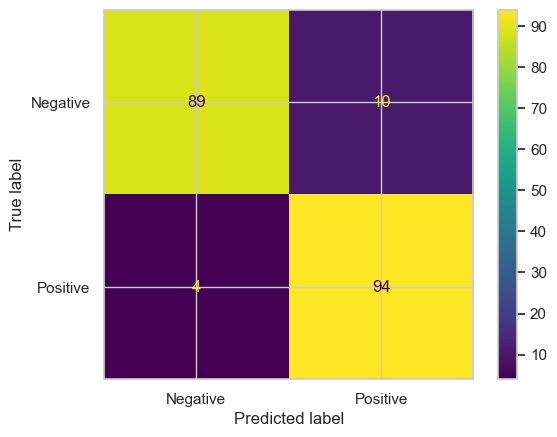

In [27]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_hybrid, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()
plt.show()

For the basic hybrid model, 94 fraud transactions were correctly identified as fraud and 89 non-fraud transactions were correctly classified as non-fraud. Furthermore, 10 non-fraud transactions were incorrectly flagged as fraud and 4 fraud transactions were missed and incorrectly classified as non-fraud. This indicates that while the basic hybrid model is effective at detecting fraud, it has a slightly higher tendency to flag non-fraud transactions as fraud. 

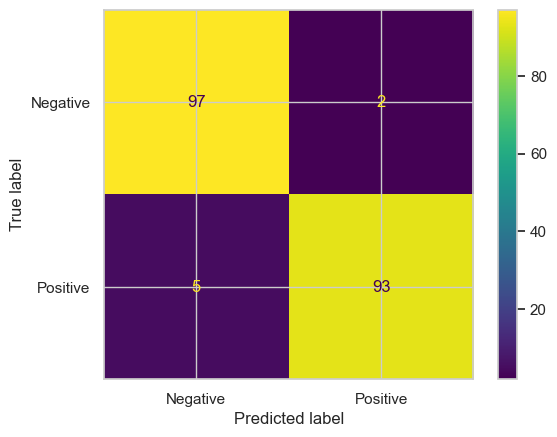

In [28]:
cm = confusion_matrix(y_test, y_pred_new_hybrid, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()
plt.show()

For the enhanced hybrid model, 93 fraud transactions were correctly identified as fraud and 97 non-fraud transactions were correctly classified as non-fraud. Furthermore, 2 non-fraud transactions were incorrectly flagged as fraud and 5 fraud transactions were missed and incorrectly classified as non-fraud. The enhanced hybrid model showed a significant improvement in flagging fewer transactions as fraud. However, the enhanced model missed one more fraud case than the basic model. 

This difference reflects the balance between precision and recall: the basic hybrid model prioritises recall, successfully identifying slightly more fraud cases, while the enhanced hybrid model prioritises precision by minimising false positives. The choice between these models may depend on the specific use case. In scenarios where minimising false positives is more important (i.e., reducing customer complaints), the enhanced model would be preferred. Conversely, if identifying every possible fraud case is more important, the basic hybrid model’s higher recall might be more suitable.

<h3><b>6.2. K-fold Cross-validation</b></h3>

In [29]:
# Check shapes
print(X_train_cnn.shape)
print(X_train_rnn.shape)
print(X_train.shape)
print(y_train.shape)

(590, 30, 1)
(590, 1, 30)
(590, 30)
(590,)


In [30]:
# Convert data to numpy arrays
X_train_cnn = np.array(X_train_cnn)
X_train_rnn = np.array(X_train_rnn)
X_train_fnn = np.array(X_train)
y_train = np.array(y_train)

# Check shapes again
print(X_train_cnn.shape)
print(X_train_rnn.shape)
print(X_train_fnn.shape)
print(y_train.shape)

(590, 30, 1)
(590, 1, 30)
(590, 30)
(590,)


In [31]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold

# Define the number of folds for cross-validation
num_folds = 5

# Define the number of iterations
num_iterations = 3

# Initialize lists to store accuracy scores
accuracy_scores = []

In [32]:
# Import necessary libraries
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.models import Model

# Define the input layers
input_layer_cnn = Input(shape=(X_train.shape[1], 1))
input_layer_rnn = Input(shape=(1, X_train.shape[1]))
input_layer_fnn = Input(shape=(X_train.shape[1],))

# CNN part
cnn = Conv1D(32, kernel_size=3, activation='relu')(input_layer_cnn)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn_output = Dense(64, activation='relu')(cnn)

# RNN part
rnn = SimpleRNN(64, activation='relu')(input_layer_rnn)
rnn_output = Dense(64, activation='relu')(rnn)

# FNN part
fnn = Dense(64, activation='relu')(input_layer_fnn)
fnn_output = Dense(64, activation='relu')(fnn)

# Concatenate the outputs
concatenated = concatenate([cnn_output, rnn_output, fnn_output])

# Add a few dense layers for learning from combined features
x = Dense(128, activation='relu')(concatenated)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Final output layer
output_layer = Dense(1, activation='sigmoid')(x)

# Define the model
k_basic_hybrid_model = Model(inputs=[input_layer_cnn, input_layer_rnn, input_layer_fnn], outputs=output_layer)

# Compile the model
k_basic_hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Loop through iterations
for i in range(num_iterations):
    print(f'Iteration: {i + 1}')

    # Initialize Stratified K-Fold for cross-validation
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize list to store fold accuracy
    fold_accuracies = []

    # Loop through folds using Stratified K-Fold
    for j, (train_index, val_index) in enumerate(skf.split(X_train_cnn, y_train)):
        print(f'Processing Fold: {j + 1}')

        # Split data into training and validation sets
        X_train_cnn_fold, X_val_cnn_fold = X_train_cnn[train_index], X_train_cnn[val_index]
        X_train_rnn_fold, X_val_rnn_fold = X_train_rnn[train_index], X_train_rnn[val_index]
        X_train_fnn_fold, X_val_fnn_fold = X_train_fnn[train_index], X_train_fnn[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Train the model
        history_k_basic_hybrid = k_basic_hybrid_model.fit(
            [X_train_cnn_fold, X_train_rnn_fold, X_train_fnn_fold], y_train_fold,
            epochs=20, batch_size=128,
            validation_data=([X_val_cnn_fold, X_val_rnn_fold, X_val_fnn_fold], y_val_fold),
            callbacks=[early_stopping],
            verbose=0
        )

        # Evaluate the model on the validation set
        val_loss, accuracy = k_basic_hybrid_model.evaluate([X_val_cnn_fold, X_val_rnn_fold, X_val_fnn_fold], y_val_fold, verbose=0)
        fold_accuracies.append(accuracy)

    # Calculate and store mean accuracy for the current iteration
    mean_accuracy = np.mean(fold_accuracies)
    accuracy_scores.append(mean_accuracy)
    print(f'Mean Accuracy for Iteration {i + 1}: {mean_accuracy:.4f}')

# Print the overall mean accuracy across all iterations
overall_mean_accuracy = np.mean(accuracy_scores)
print(f'Overall Mean Accuracy: {overall_mean_accuracy:.4f}')

Iteration: 1
Processing Fold: 1
Processing Fold: 2
Processing Fold: 3
Processing Fold: 4
Processing Fold: 5
Mean Accuracy for Iteration 1: 0.9542
Iteration: 2
Processing Fold: 1
Processing Fold: 2
Processing Fold: 3
Processing Fold: 4
Processing Fold: 5
Mean Accuracy for Iteration 2: 0.9780
Iteration: 3
Processing Fold: 1
Processing Fold: 2
Processing Fold: 3
Processing Fold: 4
Processing Fold: 5
Mean Accuracy for Iteration 3: 0.9847
Overall Mean Accuracy: 0.9723


In [34]:
# CNN part with L2 regularization
cnn = Conv1D(32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01))(input_layer_cnn)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn_output = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(cnn)

# RNN part with L2 regularization
rnn = LSTM(32, kernel_regularizer=l2(0.01), return_sequences=False)(input_layer_rnn)
rnn_output = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(rnn)

# FNN part with L2 regularization and Batch Normalization
fnn = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer_fnn)
fnn = BatchNormalization()(fnn)
fnn_output = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(fnn)

# Concatenate the outputs
concatenated = concatenate([cnn_output, rnn_output, fnn_output])

# Add dense layers with L2 regularization and Batch Normalization
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(concatenated)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Final output layer
output_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(x)

# Define the model
k_enhc_hybrid_model = Model(inputs=[input_layer_cnn, input_layer_rnn, input_layer_fnn], outputs=output_layer)

# Compile the model
k_enhc_hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [35]:
# Loop through iterations
for i in range(num_iterations):
    print(f'Iteration: {i + 1}')

    # Initialize Stratified K-Fold for cross-validation
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize list to store fold accuracy
    fold_accuracies = []

    # Loop through folds using Stratified K-Fold
    for j, (train_index, val_index) in enumerate(skf.split(X_train_cnn, y_train)):
        print(f'Processing Fold: {j + 1}')

        # Split data into training and validation sets
        X_train_cnn_fold, X_val_cnn_fold = X_train_cnn[train_index], X_train_cnn[val_index]
        X_train_rnn_fold, X_val_rnn_fold = X_train_rnn[train_index], X_train_rnn[val_index]
        X_train_fnn_fold, X_val_fnn_fold = X_train_fnn[train_index], X_train_fnn[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Train the model
        history_k_enhc_hybrid = k_enhc_hybrid_model.fit(
            [X_train_cnn_fold, X_train_rnn_fold, X_train_fnn_fold], y_train_fold,
            epochs=20, batch_size=128,
            validation_data=([X_val_cnn_fold, X_val_rnn_fold, X_val_fnn_fold], y_val_fold),
            callbacks=[early_stopping],
            verbose=0
        )

        # Evaluate the model on the validation set
        val_loss, accuracy = k_enhc_hybrid_model.evaluate([X_val_cnn_fold, X_val_rnn_fold, X_val_fnn_fold], y_val_fold, verbose=0)
        fold_accuracies.append(accuracy)

    # Calculate and store mean accuracy for the current iteration
    mean_accuracy = np.mean(fold_accuracies)
    accuracy_scores.append(mean_accuracy)
    print(f'Mean Accuracy for Iteration {i + 1}: {mean_accuracy:.4f}')

# Print the overall mean accuracy across all iterations
overall_mean_accuracy = np.mean(accuracy_scores)
print(f'Overall Mean Accuracy: {overall_mean_accuracy:.4f}')

Iteration: 1
Processing Fold: 1
Processing Fold: 2
Processing Fold: 3
Processing Fold: 4
Processing Fold: 5
Mean Accuracy for Iteration 1: 0.9424
Iteration: 2
Processing Fold: 1
Processing Fold: 2
Processing Fold: 3
Processing Fold: 4
Processing Fold: 5
Mean Accuracy for Iteration 2: 0.9932
Iteration: 3
Processing Fold: 1
Processing Fold: 2
Processing Fold: 3
Processing Fold: 4
Processing Fold: 5
Mean Accuracy for Iteration 3: 1.0000
Overall Mean Accuracy: 0.9754


Cross-validation provides a more robust evaluation by dividing the data into multiple subsets, training the models on different subsets, and averaging the results. 
The basic hybrid model showed consistently high accuracy, with a slight increase across iterations, and achieved an overall mean accuracy of 0.9723. On the other hand, the enhanced hybrid model started with a slightly lower accuracy in the first iteration (0.9424) but improved significantly in later iterations, reaching 1.0000 in the third iteration. Its mean accuracy is 0.9754, slightly higher than the basic model. This indicates that the enhanced model may generalise slightly better across different data splits as compared to the basic model.
